In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def draw(X, y):
    if X.shape[-1] >= 2:
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X)
        df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
        df_pca['class'] = y
        plt.figure(figsize=(6, 5))
        sns.scatterplot(x='PC1', y='PC2', data=df_pca, hue='class', 
                        palette=sns.color_palette("hsv", len(np.unique(y))),  legend="full")
    elif X.shape[-1] == 1:
        padding = np.random.random(X.shape)
        X = np.concatenate([X, padding], axis=-1)
        draw(X, y)
    else: # dim == 0
        raise RuntimeError("X.shape[-1]==0, Make sure a right X input.")

In [2]:
from sklearn.preprocessing import StandardScaler
sonar = pd.read_csv("./sonar.all-data.csv", header=None)
X = sonar.iloc[:, :-1].values
y = sonar.iloc[:, -1].values
y = pd.factorize(y)[0]
# scaler = StandardScaler()
# X = scaler.fit_transform(X)
# draw(X, y)

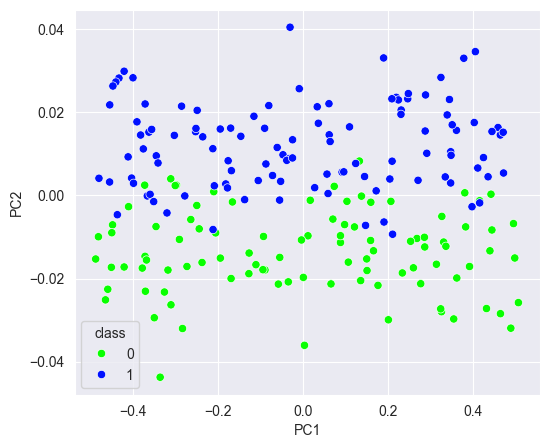

In [3]:
from lda import LDA
lda = LDA(n_components=1)
lda.fit(X, y)
reduced_X = lda(X)
draw(reduced_X, y)

In [4]:
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.preprocessing import StandardScaler

def cal_metrics(clf, X=reduced_X):
    loo = LeaveOneOut()
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    # Calculate accuracy
    acc_scores = cross_val_score(clf, X_scaled, y, cv=loo)
    acc = acc_scores.mean() * 100
    return acc, None

from sklearn.naive_bayes import GaussianNB as Classifier
acc, _ = cal_metrics(Classifier())
print(f"GaussianNB_acc:\t\t\t\t{acc:.3f}")

from sklearn.linear_model import LogisticRegression as Classifier
acc, _ = cal_metrics(Classifier())
print(f"LogisticRegression_acc:\t\t{acc:.3f}")

from sklearn.neighbors import KNeighborsClassifier as Classifier
acc, _ = cal_metrics(Classifier(n_neighbors=8))
print(f"KNeighborsClassifier_acc:\t{acc:.3f}")

GaussianNB_acc:				89.904
LogisticRegression_acc:		89.904
KNeighborsClassifier_acc:	91.346


In [5]:
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.preprocessing import StandardScaler

def cal_metrics(clf, X=X):
    loo = LeaveOneOut()
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    # Calculate accuracy
    acc_scores = cross_val_score(clf, X_scaled, y, cv=loo)
    acc = acc_scores.mean() * 100
    return acc, None

from sklearn.naive_bayes import GaussianNB as Classifier
acc, _ = cal_metrics(Classifier())
print(f"GaussianNB_acc:\t\t\t\t{acc:.3f}")

from sklearn.linear_model import LogisticRegression as Classifier
acc, _ = cal_metrics(Classifier())
print(f"LogisticRegression_acc:\t\t{acc:.3f}")

from sklearn.neighbors import KNeighborsClassifier as Classifier
acc, _ = cal_metrics(Classifier(n_neighbors=1))
print(f"KNeighborsClassifier_acc:\t{acc:.3f}")

GaussianNB_acc:				67.308
LogisticRegression_acc:		77.404
KNeighborsClassifier_acc:	87.500
